In [8]:
# import questions.csv
import pandas as pd


questions = pd.read_csv('../data/questions.csv')
questions.head(5)

,question,qnum,person,wikidataperson,text,date
0,https://id.parliament.uk/0IwOO533,903422,https://id.parliament.uk/Vs3bGLNz,http://www.wikidata.org/entity/Q689287,Which three departments had the lowest proport...,2023-01-05+00:00
1,https://id.parliament.uk/dRJ9254g,117748,https://id.parliament.uk/eD0yd5Ec,http://www.wikidata.org/entity/Q19871931,"To ask the Secretary of State for Foreign, Com...",2023-01-06+00:00
2,https://id.parliament.uk/e4IDRkKi,117410,https://id.parliament.uk/RlIqlixq,http://www.wikidata.org/entity/Q695228,"To ask the Secretary of State for Foreign, Com...",2023-01-06+00:00
3,https://id.parliament.uk/rXZ0r1JW,117477,https://id.parliament.uk/1DzMUkBy,http://www.wikidata.org/entity/Q337812,"To ask the Secretary of State for Foreign, Com...",2023-01-06+00:00
4,https://id.parliament.uk/SmC4cGhg,117777,https://id.parliament.uk/tOfis7j9,http://www.wikidata.org/entity/Q27942399,To ask the Secretary of State for Health and S...,2023-01-06+00:00


In [9]:
import geopandas as gpd
en = gpd.read_file("../shape/english_region_region.shp")


sct_wls = gpd.read_file("../shape/scotland_and_wales_region.shp")
#sct_wls = sct_wls.drop_duplicates(subset=['NAME'])

ni = gpd.read_file("../shape/OSNI_Open_Data_-_Largescale_Boundaries_-_County_Boundaries_.shp")

ni.rename(columns={'CountyName': 'NAME'}, inplace=True)
ni["NAME"] = ni["NAME"].str.lower()
ni["NAME"] = ni["NAME"].str.capitalize()

In [10]:
# scotland and wales split unnecessarily into many polygons for the same region
# as such, I have merged them into one polygon per region
sct_wls = sct_wls.dissolve(by='NAME', aggfunc='sum')
sct_wls = sct_wls.reset_index()
sct_wls

,NAME,geometry,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1
0,Central Scotland PER,"POLYGON ((273712.622 645542.835, 273719.020 64...",SPE,Scottish Parliament Electoral Region,CENTRAL_SCOTLAND_PER,1481,1481,124639,41546,S17000019,95483.869,1779.513,VA,CIVIL VOTING AREA,0,0
1,Glasgow PER,"POLYGON ((258096.702 672970.504, 258136.798 67...",SPE,Scottish Parliament Electoral Region,GLASGOW_PER,1482,1482,126812,41543,S17000020,20946.624,185.985,VA,CIVIL VOTING AREA,0,0
2,Highlands and Islands PER,"MULTIPOLYGON (((55661.497 780686.500, 55667.49...",SPESPESPESPESPESPESPESPESPESPESPESPESPESPESPES...,Scottish Parliament Electoral RegionScottish P...,HIGHLANDS_AND_ISLANDS_PERHIGHLANDS_AND_ISLANDS...,3544407,3544407,354159521,110426610,S17000011S17000011S17000011S17000011S17000011S...,4125655.196,91527.212,VAVAVAVAVAVAVAVAVAVAVAVAVAVAVAVAVAVAVAVAVAVAVA...,CIVIL VOTING AREACIVIL VOTING AREACIVIL VOTING...,0,0
3,Lothian PER,"MULTIPOLYGON (((302334.395 655991.635, 302261....",SPE,Scottish Parliament Electoral Region,LOTHIAN_PER,1845,1845,127109,41548,S17000012,87283.885,1380.037,VA,CIVIL VOTING AREA,0,0
4,Mid Scotland and Fife PER,"MULTIPOLYGON (((329246.501 683248.502, 329259....",SPE,Scottish Parliament Electoral Region,MID_SCOTLAND_AND_FIFE_PER,1844,1844,124448,41547,S17000013,921251.932,9183.679,VA,CIVIL VOTING AREA,0,0
5,Mid and West Wales PER,"MULTIPOLYGON (((173935.497 205587.601, 173950....",WPE,Welsh Parliament Electoral Region,MID_AND_WEST_WALES_PER,1840,1840,125400,41534,W10000006,1327687.465,16492.446,VA,CIVIL VOTING AREA,0,0
6,North East Scotland PER,"MULTIPOLYGON (((349502.340 868854.560, 349490....",SPE,Scottish Parliament Electoral Region,NORTH_EAST_SCOTLAND_PER,1842,1842,126822,41542,S17000014,901018.611,6177.947,VA,CIVIL VOTING AREA,0,0
7,North Wales PER,"MULTIPOLYGON (((310816.300 385718.100, 310835....",WPE,Welsh Parliament Electoral Region,NORTH_WALES_PER,1841,1841,129136,41535,W10000001,417239.114,13517.146,VA,CIVIL VOTING AREA,0,0
8,South Scotland PER,"MULTIPOLYGON (((266029.102 543547.701, 266029....",SPE,Scottish Parliament Electoral Region,SOUTH_SCOTLAND_PER,1843,1843,127122,41544,S17000015,1638266.161,27126.801,VA,CIVIL VOTING AREA,0,0
9,South Wales Central PER,"MULTIPOLYGON (((322144.197 165168.900, 322164....",WPE,Welsh Parliament Electoral Region,SOUTH_WALES_CENTRAL_PER,1838,1838,122463,41532,W10000007,87667.662,1568.413,VA,CIVIL VOTING AREA,0,0


In [11]:
# convert the shapefiles of northern ireland to BNG
print(en.crs)
print(ni.crs)

ni = ni.to_crs(en.crs)

EPSG:27700
EPSG:29902


In [12]:
len(sct_wls)

13

In [13]:
UK = pd.concat([en[["NAME", "geometry"]], sct_wls[["NAME", "geometry"]]], ignore_index=True)
UK = pd.concat([UK, ni[["NAME", "geometry"]]], ignore_index=True)
               
UK = gpd.GeoDataFrame(UK)
UK.set_geometry("geometry", inplace=True)
UK

,NAME,geometry
0,East Midlands English Region,"POLYGON ((413673.997 400018.995, 413676.198 39..."
1,London English Region,"POLYGON ((531024.595 200933.623, 531026.320 20..."
2,North West English Region,"POLYGON ((374209.550 348536.660, 374212.450 34..."
3,West Midlands English Region,"POLYGON ((360408.943 340399.192, 360410.895 34..."
4,Yorkshire and the Humber English Region,"POLYGON ((424875.080 379990.440, 424872.170 37..."
5,South East English Region,"MULTIPOLYGON (((490173.603 256107.999, 490234...."
6,North East English Region,"MULTIPOLYGON (((398217.260 657393.560, 398226...."
7,Eastern English Region,"MULTIPOLYGON (((647445.460 323359.390, 647443...."
8,South West English Region,"MULTIPOLYGON (((418659.802 242642.204, 418662...."
9,Central Scotland PER,"POLYGON ((273712.622 645542.835, 273719.020 64..."


In [14]:
"""
SPARQL query to wikidata endpoint to get all MPs and their constituencies locations

"""
from SPARQLWrapper import SPARQLWrapper, JSON

const_df = pd.DataFrame()
sparql  = SPARQLWrapper("https://query.wikidata.org/sparql")
sparql.setQuery("""
SELECT ?person ?const ?personLabel ?constLabel ?location
WHERE
{
  ?person p:P39 ?position.
  ?position ps:P39 wd:Q77685926.
  ?position pq:P768 ?const.
  ?const wdt:P625 ?location 
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
""")

sparql.setReturnFormat(JSON)
result = sparql.query().convert()
# results -> bindings returns a list of dictionaries
result = result["results"]["bindings"]

# removed type from the results
for item in result:
    for key in item:
        item[key] = item[key]["value"]
const_df = pd.DataFrame(result)
const_df.head(3)

,const,person,location,personLabel,constLabel
0,http://www.wikidata.org/entity/Q280886,http://www.wikidata.org/entity/Q391526,Point(-2.504 51.462),Chris Skidmore,Kingswood
1,http://www.wikidata.org/entity/Q581626,http://www.wikidata.org/entity/Q19882694,Point(-3.892 55.845),Neil Gray,Airdrie and Shotts
2,http://www.wikidata.org/entity/Q588875,http://www.wikidata.org/entity/Q303883,Point(0.16 51.46),David Evennett,Bexleyheath and Crayford


In [15]:
const_df = const_df.drop_duplicates()
const_df = const_df.astype({"constLabel": "object", "personLabel": "object"})

In [16]:
# get the BNG location of each constituency
from bng_latlon import WGS84toOSGB36
const_df["easting"] = None
const_df["northing"] = None
for index, row in const_df.iterrows():
    lon, lat = row["location"].replace("Point(", "").replace(")", "").split(" ")

    lat = float(lat)
    lon = float(lon)

    x, y = WGS84toOSGB36(lat, lon)

    const_df.at[index, "easting"] = x
    const_df.at[index, "northing"] = y
const_df = const_df.drop(columns=["location"])

In [17]:
import shapely
import numpy as np

# checks which larger region each MPs constituency is in

# help from https://stackoverflow.com/questions/7861196/check-if-a-geopoint-with-latitude-and-longitude-is-within-a-shapefile



for index, row in const_df.iterrows():


    point = shapely.geometry.Point(row["easting"], row["northing"])
    point_contained = False

    for _, row2 in UK.iterrows():
        if row2["geometry"].contains(point):
            const_df.at[index, "region"] = row2["NAME"]
            point_contained = True
            break

    # some of the wikidata coordinates are in water
    # find the closest region to the point  
    if not point_contained:

        shortest_dist = np.inf
        point = shapely.geometry.Point(row["easting"], row["northing"])

        for _, row2 in UK.iterrows():
            dist = row2["geometry"].boundary.distance(point)

            if dist < shortest_dist:
                shortest_dist = dist
                closest_const = row2["NAME"]
        const_df.at[index, "region"] = closest_const

In [18]:
# iterate through each question, link it to the MP who asked it, and the region they are from
questions["region"] = None
for index, row in questions.iterrows():
    # find the row in const_df with the same name as the MP who asked the question

    row2 = const_df[const_df["person"] == row["wikidataperson"]]

    region = row2["region"].values[0]
    # set the region of the question to that region
    questions.at[index, "region"] = region

In [19]:
questions["region"].value_counts()

region
London English Region                      5736
Yorkshire and the Humber English Region    4672
North West English Region                  3296
South East English Region                  2604
West Midlands English Region               2137
North East English Region                  1798
South West English Region                  1476
East Midlands English Region               1017
Eastern English Region                      570
Glasgow PER                                 557
Down                                        531
South Wales West PER                        355
South Wales East PER                        279
Mid and West Wales PER                      273
South Scotland PER                          258
Central Scotland PER                        243
Highlands and Islands PER                   187
Londonderry                                 160
West Scotland PER                           159
South Wales Central PER                     137
Lothian PER                      

In [20]:
# go through each region and combine all the questions asked by MPs from that region into one string
corpus = {}
for region in questions["region"].unique():
    combined_text = ""
    for index, row in questions[questions["region"] == region].iterrows():
        combined_text += row["text"] + " "
    
    corpus[region] = combined_text


In [21]:
for key in corpus:
    print(key)

East Midlands English Region
London English Region
South East English Region
Yorkshire and the Humber English Region
North West English Region
West Midlands English Region
South Wales West PER
Mid and West Wales PER
North East English Region
West Scotland PER
South Wales East PER
Glasgow PER
South West English Region
Eastern English Region
North Wales PER
South Scotland PER
Londonderry
Antrim
Highlands and Islands PER
Central Scotland PER
Lothian PER
North East Scotland PER
South Wales Central PER
Down
Mid Scotland and Fife PER


In [22]:
"""Code from here http://rstudio-pubs-static.s3.amazonaws.com/79360_850b2a69980c4488b1db95987a24867a.html"""

import re
from nltk.stem.porter import PorterStemmer
from stop_words import get_stop_words
from nltk.tokenize import RegexpTokenizer

def text_to_tokens(doc):
    p_stemmer = PorterStemmer()
    tokenizer = RegexpTokenizer(r'\w+')

    doc = doc.lower()

    # remove any letter that is of the form (a)
    doc = re.sub(r'\(\w\)', '', doc)
    


    # convert to tokens
    tokens = tokenizer.tokenize(doc) 
    # remove stop words from tokens
    en_stop = get_stop_words('en')
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # remove additional words that are not in the stop words list
    additional_stop_words = ["(a)","secretary", "state", "ask", "asking", "department", "departments", "minister", "ministers", "government", "s", "i", "ii"]
    stopped_tokens = [i for i in stopped_tokens if not i in additional_stop_words]

    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]

    return stemmed_tokens

In [23]:
# tokenize and look at the most common words in each region
from nltk import FreqDist

#corpus["Down"]
tokens = text_to_tokens(corpus["Glasgow PER"])
tokens = FreqDist(tokens)
tokens.most_common(50)

corpus["Glasgow PER"]


"To ask the Secretary of State for Environment, Food and Rural Affairs, whether she has had discussions with the RCVS Veterinary Nurses Council on changing the Veterinary Surgeons Act 1966 to (a) replace the criminal standard of proof with the civil standard and (b) make improvements to the Fitness to Practise disciplinary system. To ask the Secretary of State for Business, Energy and Industrial Strategy, whether specific financial support for people in off gas grid homes will be available in 2023/24. To ask the Secretary of State for Business, Energy and Industrial Strategy, whether additional support payments for those living off gas grid will be  available to those (a) on Economy 7 tariffs and (b) using electric only heating systems. To ask the Secretary of State for Environment, Food and Rural Affairs, what recent assessment she has made of the potential impact of the effect of inflation in the cost of pet food for domestic animals on trends in the level of animal welfare. To ask t

In [24]:
list(corpus.keys())

['East Midlands English Region',
 'London English Region',
 'South East English Region',
 'Yorkshire and the Humber English Region',
 'North West English Region',
 'West Midlands English Region',
 'South Wales West PER',
 'Mid and West Wales PER',
 'North East English Region',
 'West Scotland PER',
 'South Wales East PER',
 'Glasgow PER',
 'South West English Region',
 'Eastern English Region',
 'North Wales PER',
 'South Scotland PER',
 'Londonderry',
 'Antrim',
 'Highlands and Islands PER',
 'Central Scotland PER',
 'Lothian PER',
 'North East Scotland PER',
 'South Wales Central PER',
 'Down',
 'Mid Scotland and Fife PER']

In [25]:
"""Code from here http://rstudio-pubs-static.s3.amazonaws.com/79360_850b2a69980c4488b1db95987a24867a.html"""

# 
doc_set = []

# put documents into a list in order of the keys in the corpus dictionary
for key in corpus.keys():
    doc_set = doc_set + [corpus[key]]


texts = []
for doc in doc_set:
    
    # add tokens to list
    texts.append(text_to_tokens(doc))

In [26]:
print(doc_set[0])

Which three departments had the lowest proportion of staff attending the office in January 2023. To ask the Secretary of State for Education, what steps her Department is taking to help support sixth-form colleges with rises in the cost of energy. To ask the Secretary of State for Health and Social Care, whether he has a timetable for the introduction of legislative proposals to give care home residents a legal right to receive visitors. To ask the Secretary of State for Education, what steps her Department is taking to help support sixth-form colleges with costs associated with increases in the level of inflation. To ask the Secretary of State for Education, how many further education college infrastructure projects are affected by the reclassification of colleges. To ask the Secretary of State for Environment, Food and Rural Affairs, whether she has plans to phase out the caging of laying hens by 2027. To ask the Secretary of State for Work and Pensions, how many people have accessed

In [27]:
from gensim import corpora

# create dictionary which contains the number of times a word appears and other statistics
dictionary = corpora.Dictionary(texts)


# makes a list for each document with vectors of (token_id, token_count)
bow_vectors = [dictionary.doc2bow(text) for text in texts]

In [28]:
# help from https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0
import gensim

def compute_coherence(bow_vectors, dictionary, k, a, b):
    lda_model = gensim.models.LdaMulticore(corpus=bow_vectors,
                                           id2word=dictionary,
                                             num_topics=k,
                                             chunksize=100,
                                             passes=10,
                                            alpha=a,
                                            eta=b,
                                            random_state=42
                                           )
    coherencne_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherencne_model_lda.get_coherence()



In [29]:
# Help making the grid search, and the hyperparameter ranges from https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

# grid search for the best number of topics, alpha and beta values

import os
import numpy as np
import tqdm


if os.path.exists("../data/hyper_params.csv"):
    model_results = pd.read_csv("../data/hyper_params.csv")
    model_results = model_results.drop(columns=["Unnamed: 0"])
else:    

    topics_range = list(range(2, 10, 1))

    alpha = list(np.arange(0.01, 1, 0.3))
    alpha.append("symmetric")
    alpha.append("asymmetric")

    beta = list(np.arange(0.01, 1, 0.3))
    beta.append("symmetric")

    model_results = {
                    'Topics': [],
                    'Alpha': [],
                    'Beta': [],
                    'Coherence': []
                    }


    pbar = tqdm.tqdm(total=(len(beta)*len(alpha) * len(topics_range)))

    for i, k in enumerate(topics_range):


        for a in alpha:
            for b in beta:
                
                coherence = compute_coherence(bow_vectors, dictionary, k, a, b)

                model_results['Topics'].append(k)
                model_results['Alpha'].append(a)
                model_results['Beta'].append(b)
                model_results['Coherence'].append(coherence)
                pbar.update(1)
            




In [30]:

hyper_params = pd.DataFrame(model_results)
hyper_params = hyper_params.sort_values(by=['Coherence'], ascending=False)
hyper_params

,Topics,Alpha,Beta,Coherence
0,8,asymmetric,0.01,0.310015
2,8,0.31,0.01,0.310015
3,8,0.61,0.01,0.310015
4,8,0.9099999999999999,0.01,0.310015
5,8,symmetric,0.01,0.310015
...,...,...,...,...
235,2,0.9099999999999999,0.01,0.272966
236,2,0.31,0.01,0.272966
237,2,symmetric,0.01,0.272966
238,2,asymmetric,0.01,0.272966


In [39]:
hyper_params[hyper_params["Topics"] == 4]

,Topics,Alpha,Beta,Coherence
36,4,asymmetric,0.61,0.299940
37,4,0.9099999999999999,0.61,0.299940
38,4,symmetric,0.61,0.299940
39,4,0.31,0.61,0.299940
40,4,0.61,0.61,0.299940
41,4,0.01,0.61,0.299940
42,4,symmetric,0.9099999999999999,0.299867
43,4,0.31,0.9099999999999999,0.299867
44,4,asymmetric,0.9099999999999999,0.299867
45,4,0.01,0.9099999999999999,0.299867


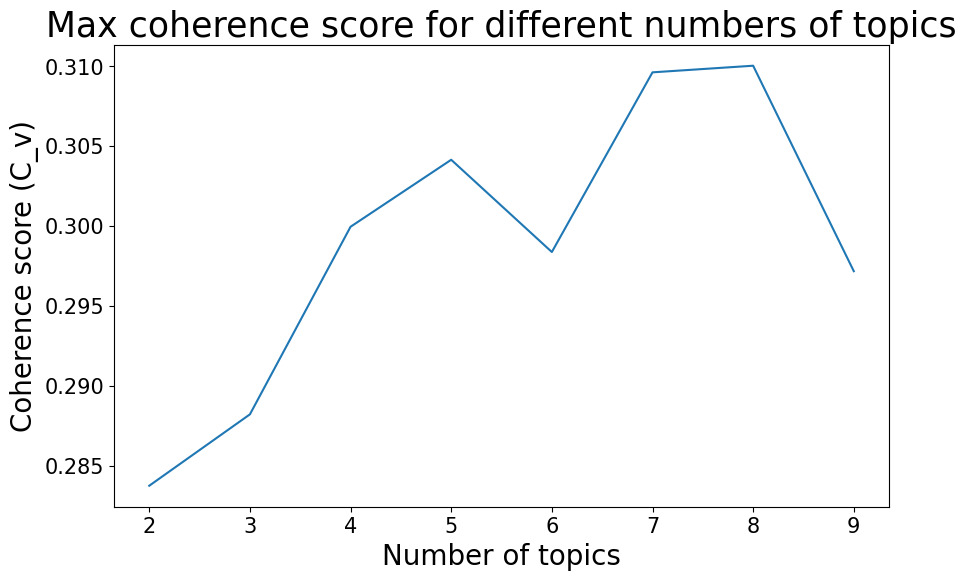

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))

max_coherence = hyper_params.groupby('Topics')['Coherence'].max()
max_coherence.plot(x="Topics", y="Coherence", ax=ax)
ax.set_xlabel("Number of topics" , fontsize=20)
ax.set_ylabel("Coherence score (C_v)", fontsize=20)
ax.tick_params(axis="both", which="major", labelsize=15)
ax.set_title("Max coherence score for different numbers of topics", fontsize=25)
plt.savefig("../visualisations/topics_coherence.png", dpi=300)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))

max_coherence = hyper_params.groupby('Beta')['Coherence'].max()
max_coherence.plot(x="Beta", y="Coherence", ax=ax)
ax.set_xlabel("Number of topics" , fontsize=20)
ax.set_ylabel("Coherence score (C_v)", fontsize=20)
ax.tick_params(axis="both", which="major", labelsize=15)
ax.set_title("Max coherence score for different numbers of topics", fontsize=25)
plt.savefig("../visualisations/topics_coherence.png", dpi=300)

In [ ]:
def print_topics(lda_model, words=4):
    for topic in lda_model.print_topics(num_words=words):
        print(topic)
        print("\n")    

In [ ]:
def get_coherence(lda_model, texts, dictionary):
    coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model_lda.get_coherence()

In [32]:
# LDA model for the best global hyperparameters
lda_model = gensim.models.LdaMulticore(corpus=bow_vectors,
                                           id2word=dictionary,
                                             num_topics=8,
                                             chunksize=100,
                                             passes=200,
                                            alpha="asymmetric",
                                            eta=0.01,
                                            random_state=42
                                           )

In [90]:
from gensim.models import CoherenceModel

coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence = coherence_model.get_coherence()

coherence


0.373919374707286

In [33]:
for topic in lda_model.print_topics(num_words=4):
    print(topic)
    print("\n")

# print(lda_model.print_topics(num_topics=8, num_words=3))

(0, '0.021*"health" + 0.020*"care" + 0.017*"social" + 0.017*"assess"')


(1, '0.018*"whether" + 0.015*"made" + 0.015*"energi" + 0.014*"assess"')


(2, '0.025*"school" + 0.021*"educ" + 0.012*"2023" + 0.012*"teacher"')


(3, '0.000*"inhal" + 0.000*"infantri" + 0.000*"inspectio" + 0.000*"inhibit"')


(4, '0.016*"will" + 0.015*"health" + 0.015*"assess" + 0.014*"whether"')


(5, '0.014*"health" + 0.012*"whether" + 0.012*"care" + 0.012*"made"')


(6, '0.030*"defenc" + 0.018*"health" + 0.018*"care" + 0.016*"social"')


(7, '0.018*"made" + 0.017*"assess" + 0.013*"step" + 0.012*"take"')




In [40]:
# Best LDA model fo
lda_model_2 = gensim.models.LdaMulticore(corpus=bow_vectors,
                                           id2word=dictionary,
                                             num_topics=4,
                                             chunksize=100,
                                             passes=10,
                                            alpha="symmetric",
                                            eta=0.61,
                                            random_state=20
                                           )

In [145]:


coherence_model = CoherenceModel(model=lda_model_2, texts=texts, dictionary=dictionary, coherence='c_v')
coherence = coherence_model.get_coherence()

coherence

0.33645905606986415

In [38]:
lda_model_2.print_topics(num_topics=4, num_words=4)

[(0, '0.016*"health" + 0.015*"care" + 0.014*"will" + 0.014*"social"'),
 (1, '0.014*"made" + 0.012*"assess" + 0.012*"whether" + 0.012*"health"'),
 (2, '0.015*"school" + 0.013*"educ" + 0.010*"whether" + 0.009*"2023"'),
 (3, '0.004*"health" + 0.004*"care" + 0.003*"whether" + 0.003*"affair"')]

In [37]:
for topic in lda_model.print_topics(num_words=3):
    print(topic)
    print("\n")

# print(lda_model.print_topics(num_topics=8, num_words=3))

(0, '0.021*"health" + 0.020*"care" + 0.017*"social"')


(1, '0.018*"whether" + 0.015*"made" + 0.015*"energi"')


(2, '0.025*"school" + 0.021*"educ" + 0.012*"2023"')


(3, '0.000*"infantri" + 0.000*"inhal" + 0.000*"inspectio"')


(4, '0.016*"will" + 0.015*"health" + 0.015*"assess"')


(5, '0.014*"health" + 0.012*"whether" + 0.012*"care"')


(6, '0.030*"defenc" + 0.018*"health" + 0.018*"care"')


(7, '0.018*"made" + 0.017*"assess" + 0.013*"step"')




In [113]:
regional_topics = pd.DataFrame(columns=["region", "topic", "topic_prob"])

# bow vector is ordered the same as the corpus keys
names = list(corpus.keys())

for index, vector in enumerate(bow_vectors):

    # get the topics for a particular region
    doc_topics = lda_model.get_document_topics(vector)

    for topic in doc_topics:
        regional_topics = pd.concat(
            [regional_topics, 
             pd.DataFrame({"region": [names[index]], "topic": [topic[0]], "topic_prob": [topic[1]]})], 
             ignore_index=True)
        

C:\Users\Test\AppData\Local\Temp\ipykernel_14564\1374291090.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  regional_topics = pd.concat(


In [117]:
regional_topics["topic"].value_counts()

topic
5    23
0    18
4    17
1    16
6    15
7    14
2     4
Name: count, dtype: int64

In [115]:
regional_topics[regional_topics["topic"] == 3].sort_values(by="topic_prob", ascending=False)

,region,topic,topic_prob
